In [1]:
#import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data 
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# checking the data for null values and datatypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# no null values detected in the data

In [7]:
# renaming columns with proper names 

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df1 = df.copy()

In [10]:
df1.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# drop unwanted coloumns 
# 1st - instant - this is the index that is not required in the analysis
# 2nd - dteday -  this is the date that can be dropped as we can use year month columns 
# 3rd - casual -  this is the count of causal users that is not required in the coloumns 
# 4th - registered - this is the count of registered users that is not required in the coloumns 
df1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#based on the data season columns has numbers that is mapped to seasons so mapping it to a particualr strings to make it more redeable

In [14]:
df1.season = df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
df1.month = df1.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

In [16]:
df1.weathersit = df1.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
df1.weekday = df1.weekday.map({0:'mon',1:'tue',2:'wed',3:'thus',4:'fri',5:'sat',6:'sun'})

In [18]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thus,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [20]:
## Analysing the data using graphs

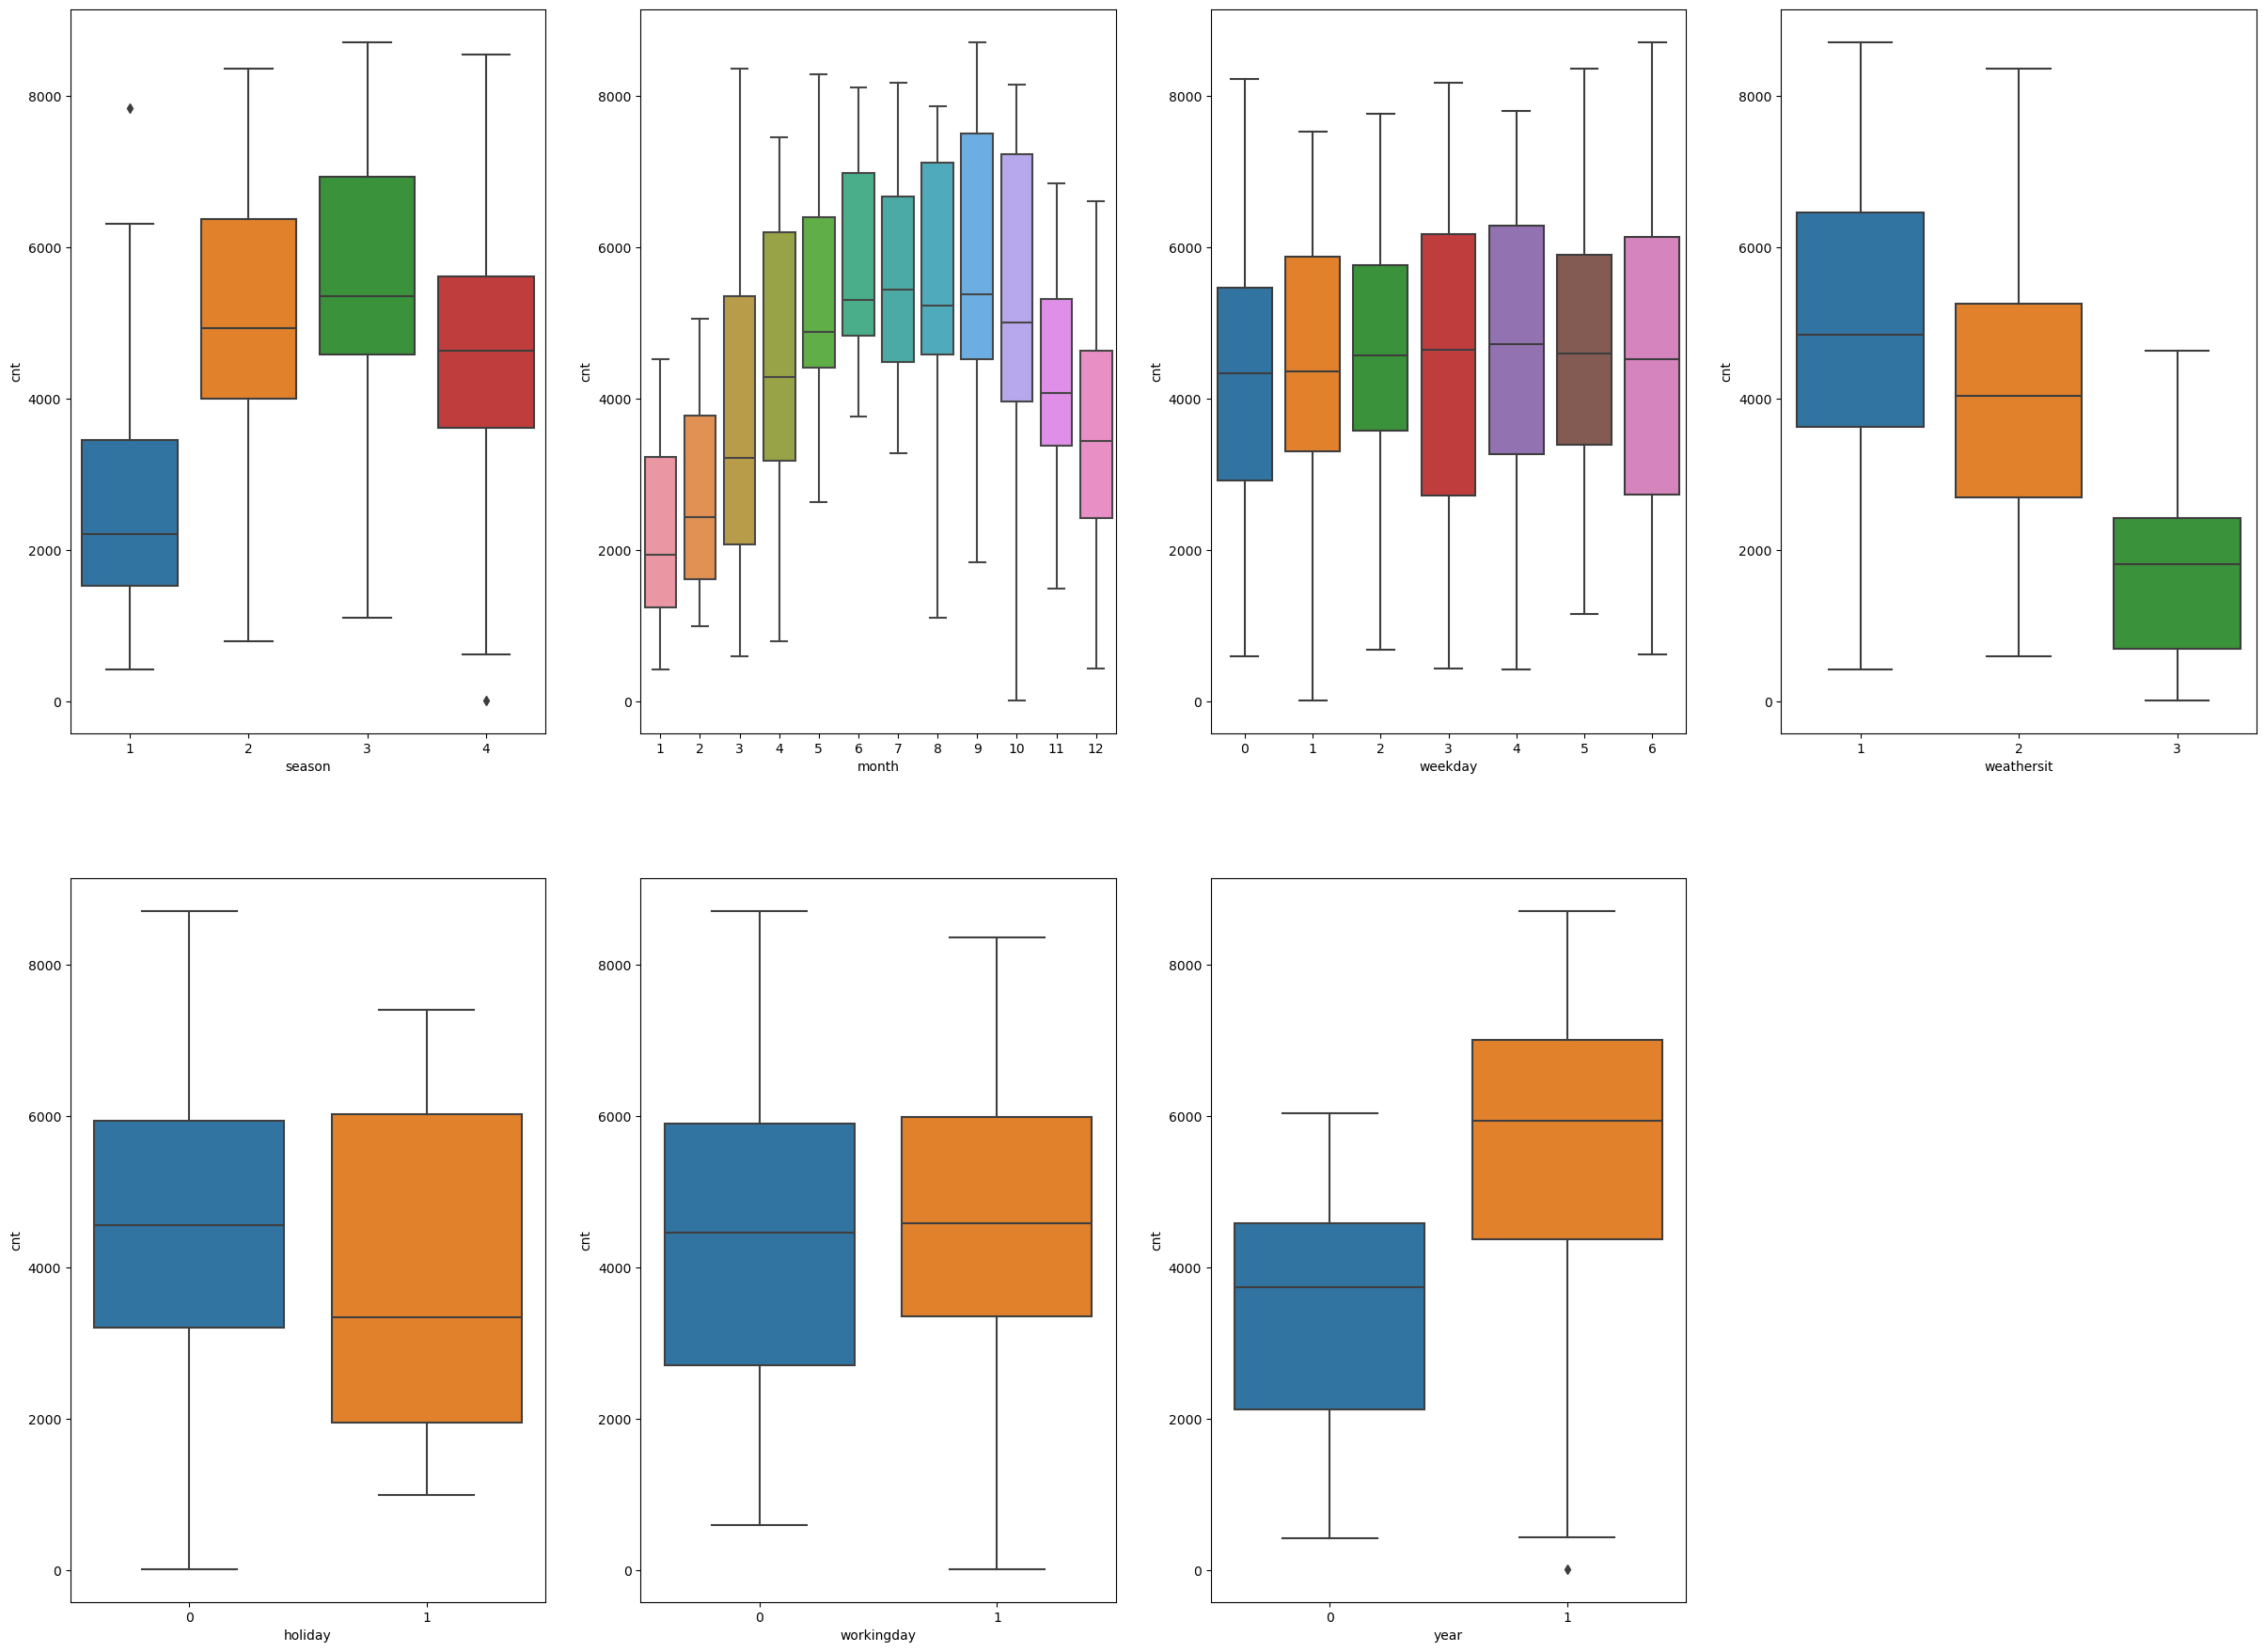

In [21]:
# lets boxplot the calategorical columns season, month, year, holiday, weekday, workingday, weathersit
plt.figure(figsize=(30, 22))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.show()

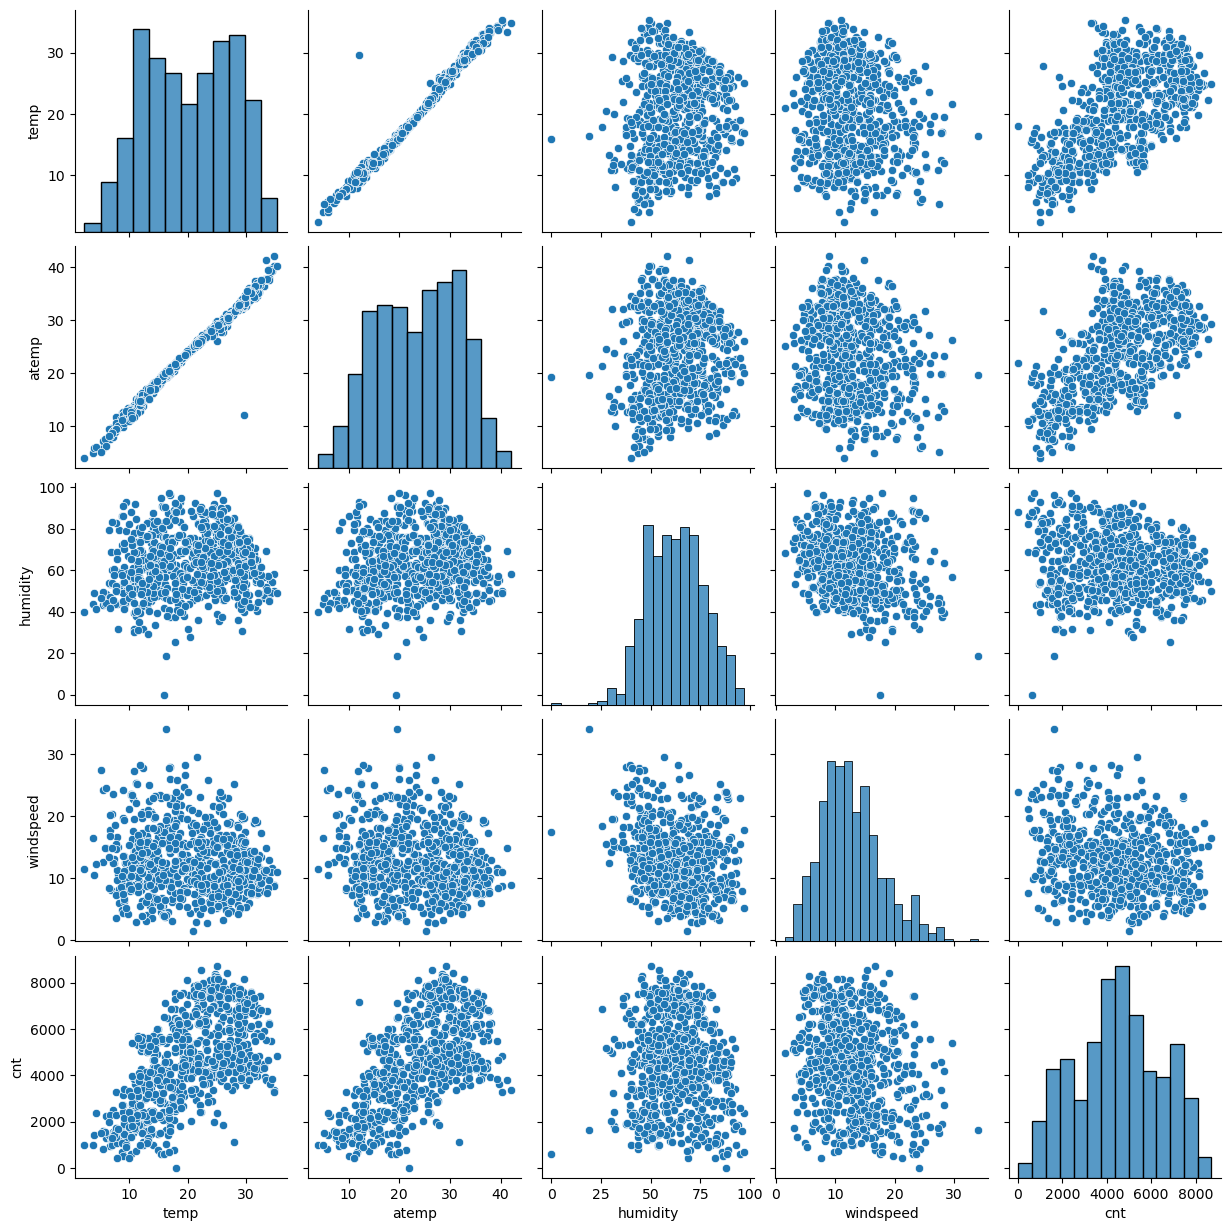

In [22]:
# analysing the numerical columns

sns.pairplot(data=df1,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()


In [23]:
# There is linear relationship between temp and atemp.



# lets prepare the data 

In [24]:
# Dummy variable creation 
# dummy vaiable for month column
month_data=pd.get_dummies(df1.month,drop_first=True,dtype='int')
# dummy vaiable for weekday column
weekday_data=pd.get_dummies(df1.weekday,drop_first=True,dtype='int')
# dummy vaiable for weathersit column
weathersit_data=pd.get_dummies(df1.weathersit,drop_first=True,dtype='int')
weathersit_data.rename(columns={2:"weather_mist_cloud", 3:"weather_light_snow_rain"},inplace=True)
# dummy vaiable for season column
season_data=pd.get_dummies(df1.season,drop_first=True,dtype='int')
season_data.rename(columns={2:"season_summer", 3:"season_fall", 4:"season_winter"},inplace=True)

In [25]:
df1.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thus,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
df_dummy = pd.concat([df1,month_data,weekday_data,weathersit_data,season_data],axis=1)

In [27]:
df_dummy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,1,1,0,0
1,spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,1,0,0
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,1,0,0
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,jan,0,thus,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,1,0,0


In [28]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  jun             730 non-null    int

In [29]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_dummy.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [30]:
df_dummy.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,1,0,0


In [31]:
df_dummy.info()
df_dummy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  jun             730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

(730, 30)

# Splitting the Data into Training and Testing Sets

In [32]:
# split the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size = 0.7, random_state = 100)

In [33]:
# shape of training datatset

df_train.shape

(510, 30)

In [34]:
# shape of testing datatset

df_test.shape

(220, 30)

In [35]:
#appplying min max scaler
scaler = MinMaxScaler()

In [36]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,0,0,0,0,1,0,1,0


In [37]:
# Apply scaler() except the yes-no and dummy variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,0,0,1,0,1,0


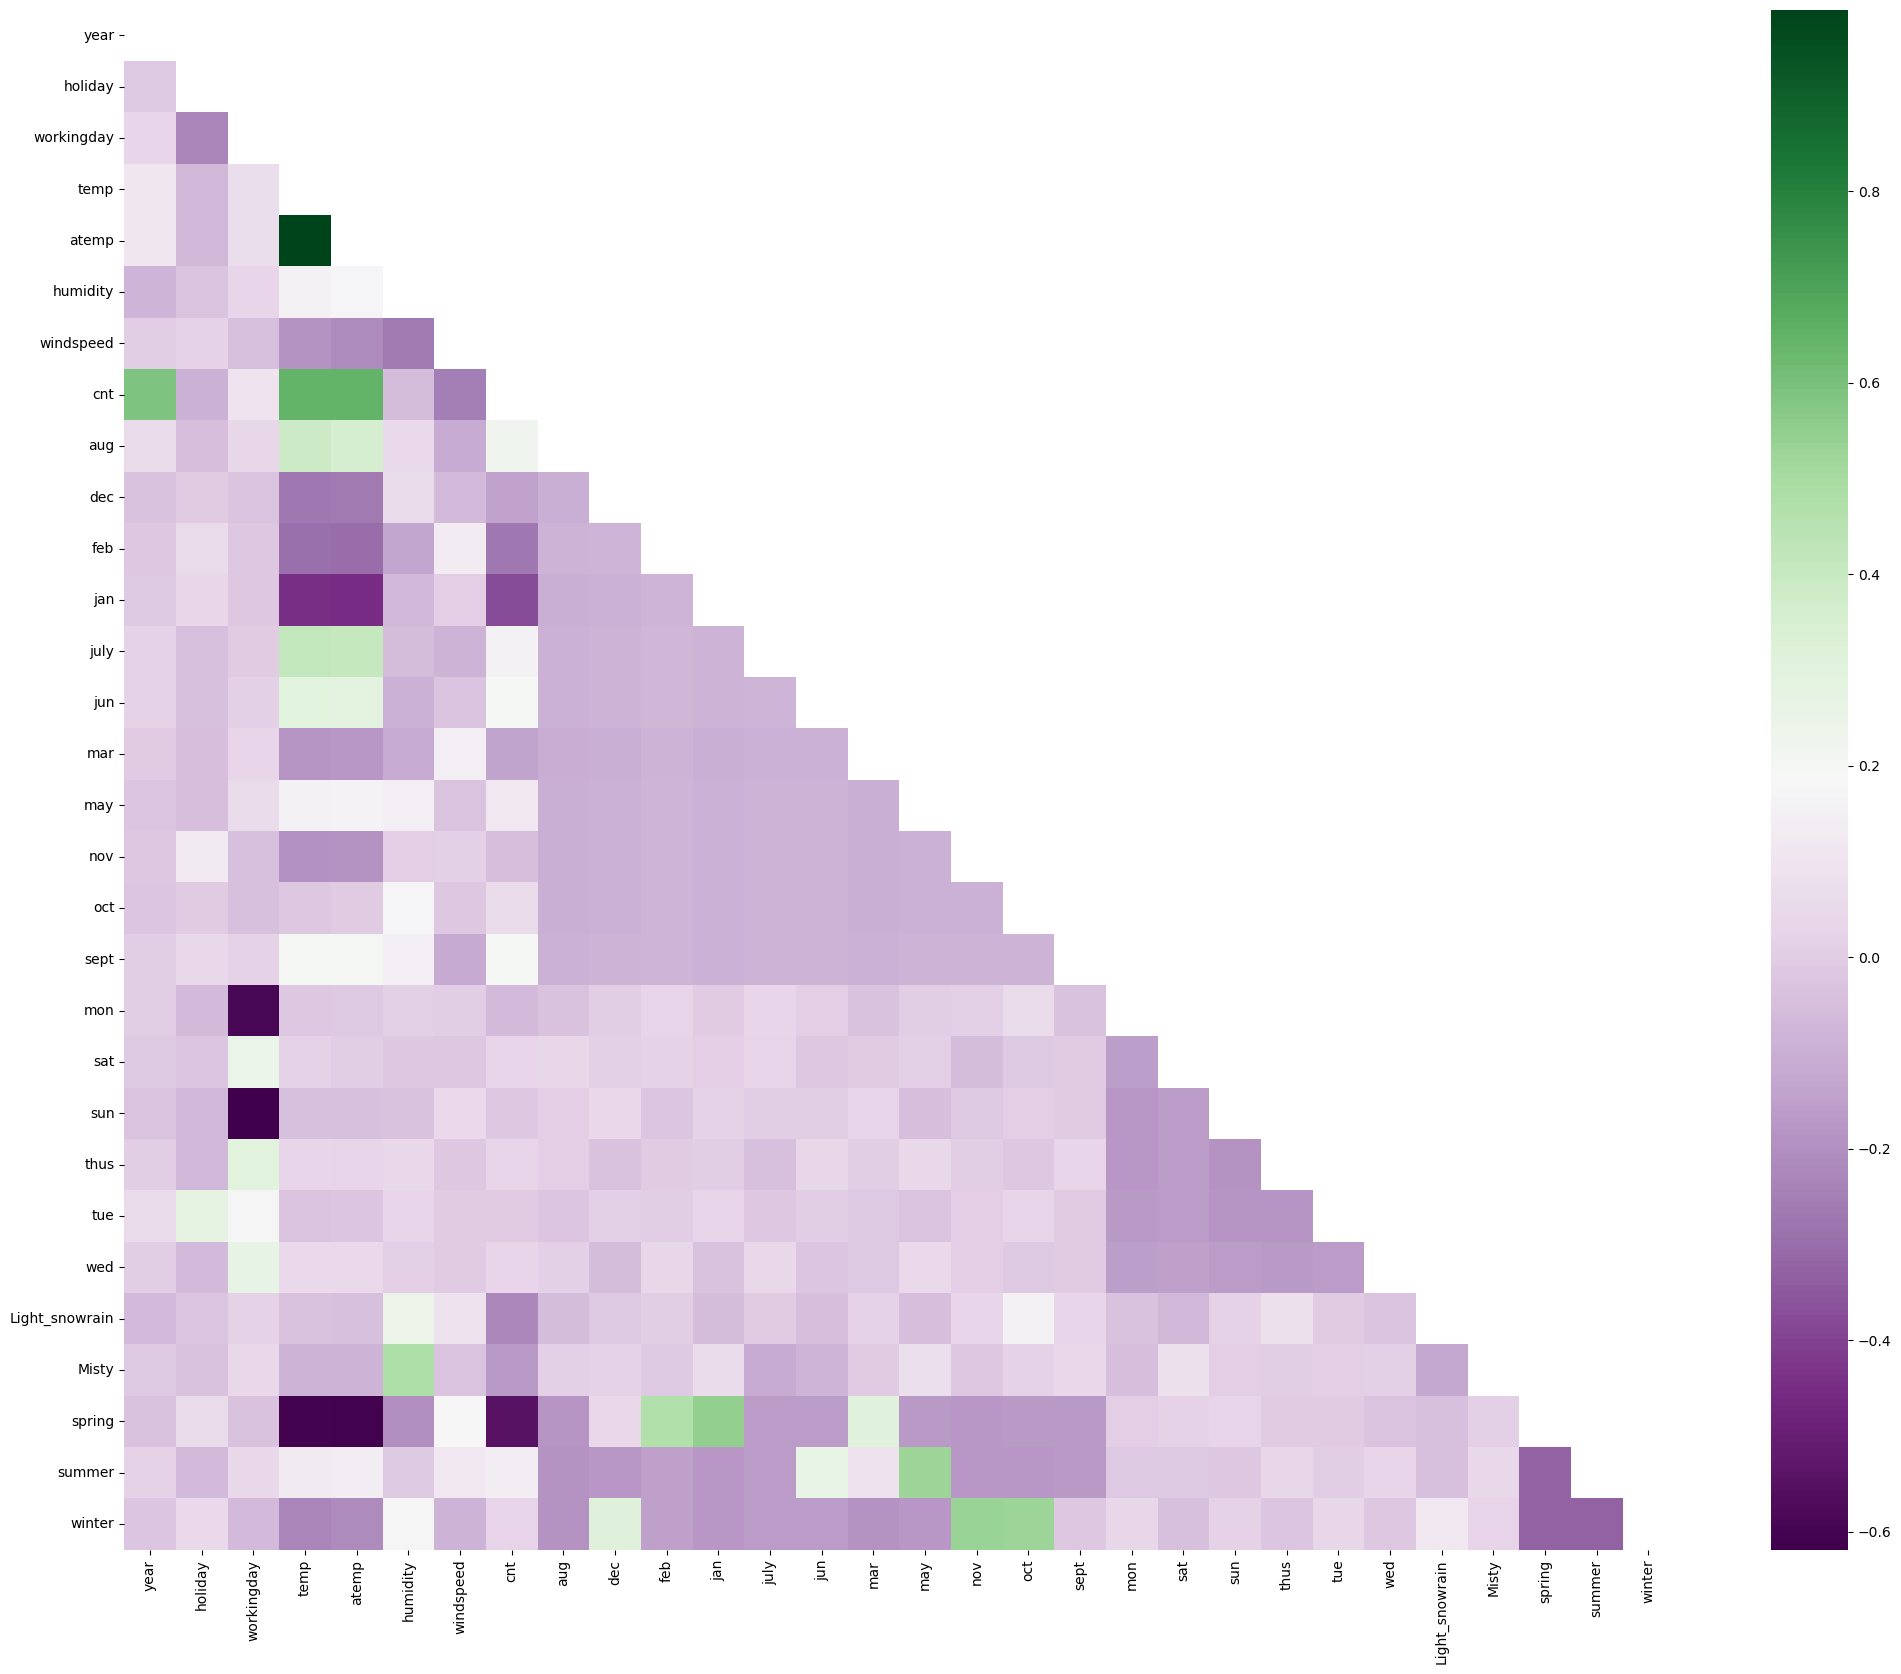

In [39]:
# checking the correlation coefficients

plt.figure(figsize = (25,20))
train_mat = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="PRGn", mask=train_mat)
plt.show()

Variable Correlations-

Key Observations
cnt:
Shows strong positive correlations with temp and atemp, indicated by dark green.
Shows a noticeable negative correlation with humidity, indicated by dark purple.

Seasonal and Monthly Effects:
spring has a strong negative correlation with jan and feb, which makes sense as these months are typically in winter.
summer has a strong positive correlation with may, suggesting a season-month alignment.
winter shows positive correlations with nov and dec, which aligns with typical seasonal definitions.

Weather Conditions:
Misty and humidity show a correlation, suggesting that misty conditions often occur with higher humidity.
Light_snow/rain shows some correlations with months like jan and feb, which can be expected due to seasonal weather patterns.

Day of the Week:
sun (Sunday) shows some correlation with other days like mon (Monday), indicating possible patterns in data collection or activities between these days.

Multicollinearity:
High correlations between variables like temp and atemp, and seasonal/monthly variables might indicate multicollinearity issues.
Variables such as cnt showing strong correlations with multiple variables suggest the need for careful consideration during model building to avoid multicollinearity.
The heatmap provides a clear visual representation of the correlations among the variables in your dataset. Addressing multicollinearity, carefully selecting variables, and understanding their relationships will be key to building an effective model.

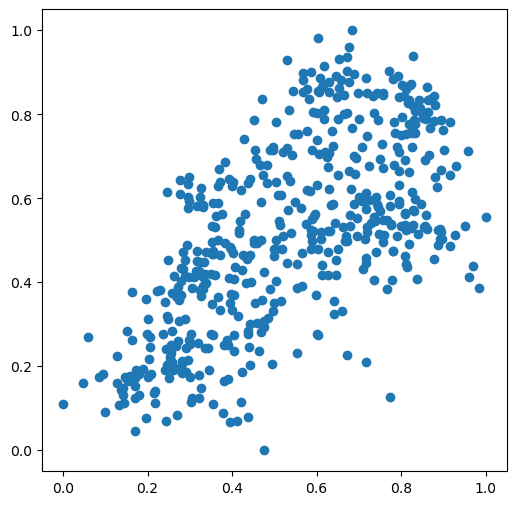

In [40]:
# Visualizing correlation to see the trends using Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [41]:
# Lets create the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
# RFE

# Create a linear regression model
lm = LinearRegression()

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#List of variables selected 15

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('jun', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', False, 11),
 ('sun', True, 1),
 ('thus', False, 14),
 ('tue', False, 9),
 ('wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sept', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [45]:
# lets check which coloumn got rejected 

In [46]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sat', 'thus', 'tue', 'wed'],
      dtype='object')

In [47]:
# lets calculate VIF 

In [48]:
def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [49]:
X_train_rfe = X_train[col]

In [50]:
calVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sun,1.98


In [51]:
# this represents that humidity has high VIF value 

# linear model

In [52]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        11:31:20   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

## R-squared: 0.848 indicates that 84.8% of the variance in cnt is explained by the model.
Adj. R-squared: 0.844, adjusted for the number of predictors, still shows a strong fit.
F-statistic: 184.0 with a very low p-value (4.22e-191), indicating the model is statistically significant.

In [53]:
# humidity has high VIF values hence dropping it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
calVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sun,1.97
5,jan,1.62
6,july,1.59


In [54]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.60e-188
Time:                        11:31:20   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

## R-squared: 0.843, indicating that 84.3% of the variance in cnt is explained by the model.
Adjusted R-squared: 0.838, slightly lower but still indicates a strong fit.
F-statistic: 189.6 with a very low p-value (1.60e-188), showing the model is statistically significant.

In [57]:
# holiday variable has high p-value hence dropping it 
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sun,1.84
4,jan,1.62
5,july,1.59


In [58]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.68e-189
Time:                        11:45:03   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

## R-squared: 0.841 indicating 84.1% of the variance in cnt is explained by the model.
Adjusted R-squared: 0.837 - Adjusted for the number of predictors, still a strong fit.
F-statistic: 202.6 (p < 0.0001) 

In [59]:
# jan variable has high p-value hence dropping it 
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sun,1.83
4,july,1.58
8,Misty,1.57


In [60]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.12e-189
Time:                        11:50:05   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

## R-squared: 0.840 indicating 84.0% of the variance in cnt is explained by the model.
Adjusted R-squared: 0.836 - Adjusted for the number of predictors, indicating a strong fit.
F-statistic: 217.2 (p < 0.0001)


In [61]:
# july variable has high p-value hence dropping it 
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sun,1.83
10,winter,1.76
7,Misty,1.57
4,sept,1.23


In [62]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.42e-188
Time:                        11:52:41   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

## R-squared: 0.838 indicating 83.8% of the variance in the dependent variable cnt is explained by the model.
Adjusted R-squared: 0.834 - Adjusted for the number of predictors, still indicating a strong fit.
F-statistic: 233.6 (p < 0.0001)

## The model shows a strong fit with several significant predictors.
## Weather conditions (temperature, windspeed, and weather type) have a notable impact on bike rentals.
## Seasonal variations also significantly influence rental counts, with higher rentals in summer and winter compared to spring.

In [63]:
# residual analysis 


In [65]:
X_train_lm_5.head()


,const,year,workingday,temp,windspeed,sept,sun,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,0,1,0


In [66]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

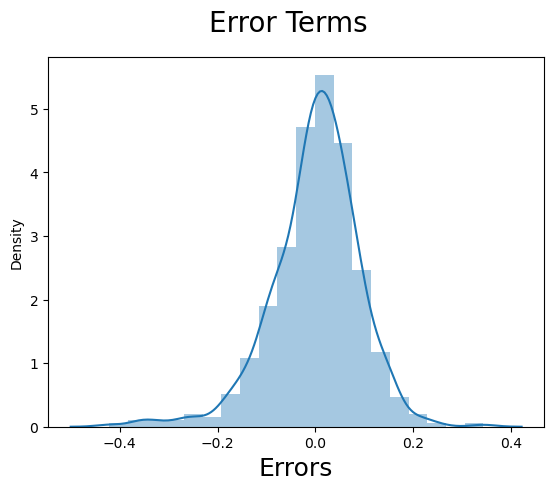

In [67]:
# lets find the error terms using histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [69]:
#based on the graph it is showing noraml distribution 

In [70]:
# calculate multi colinearity 

In [71]:
calVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sun,1.83
10,winter,1.76
7,Misty,1.57
4,sept,1.23


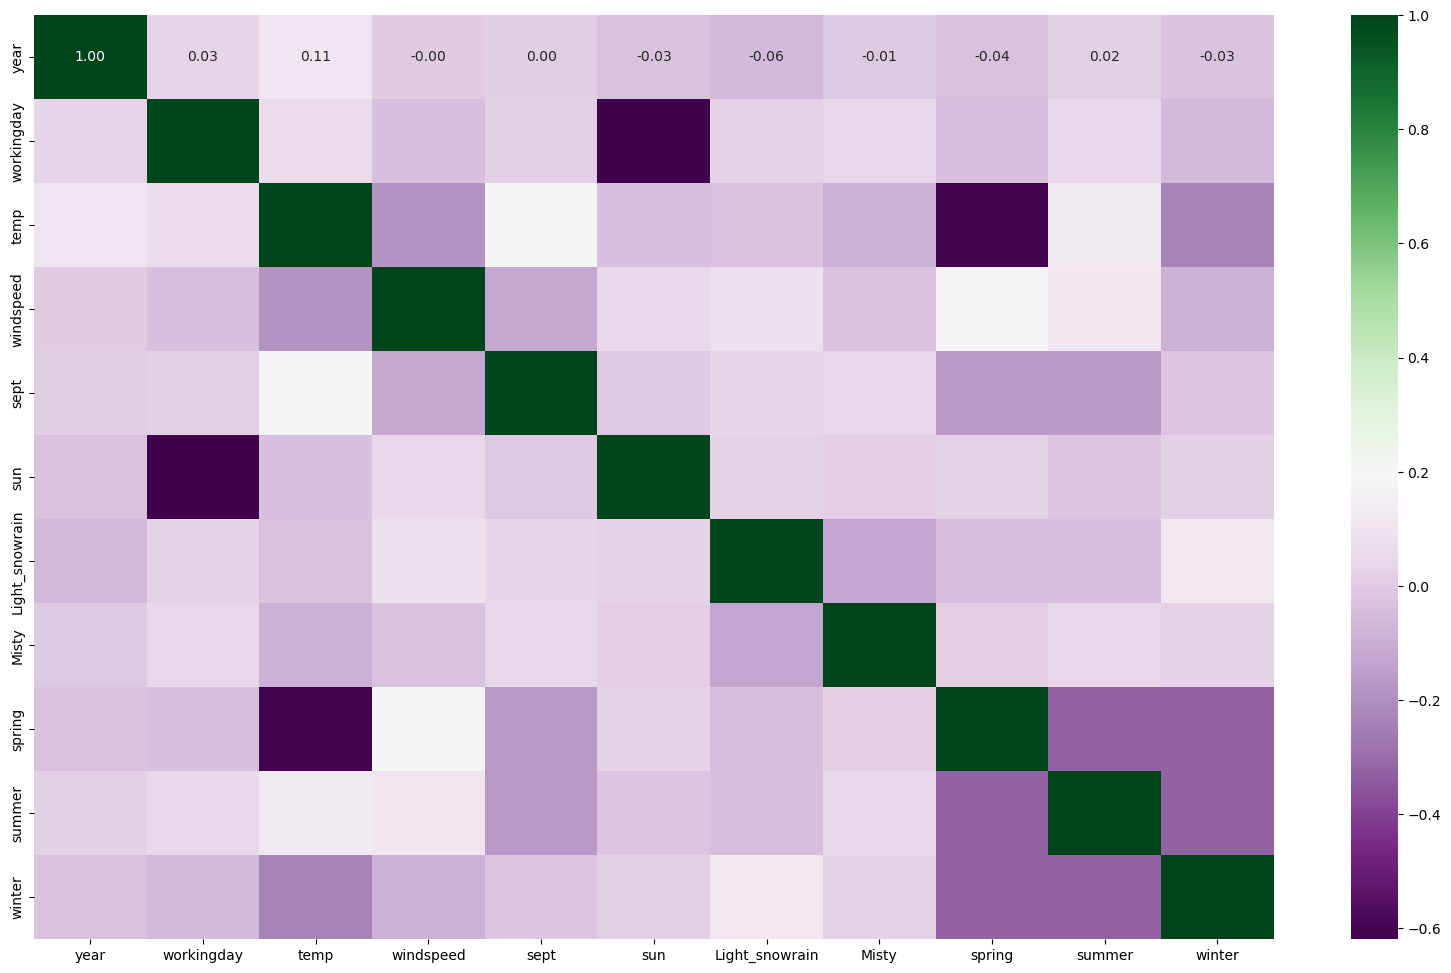

In [84]:
plt.figure(figsize=(20, 12))
sns.heatmap(X_train_new.corr(), annot=True, fmt=".2f", cmap="PRGn", annot_kws={"size": 10})
plt.show()

In [85]:
#Lineriaty 


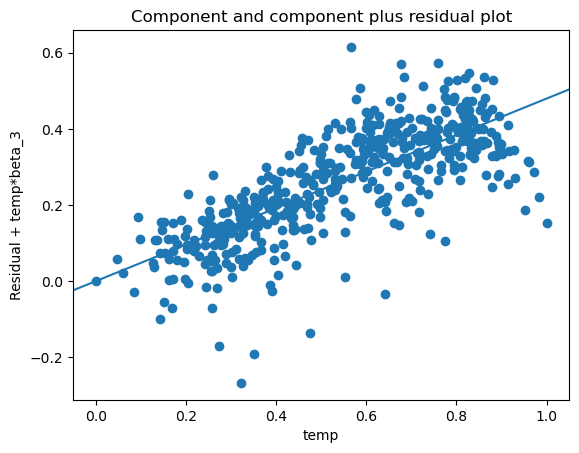

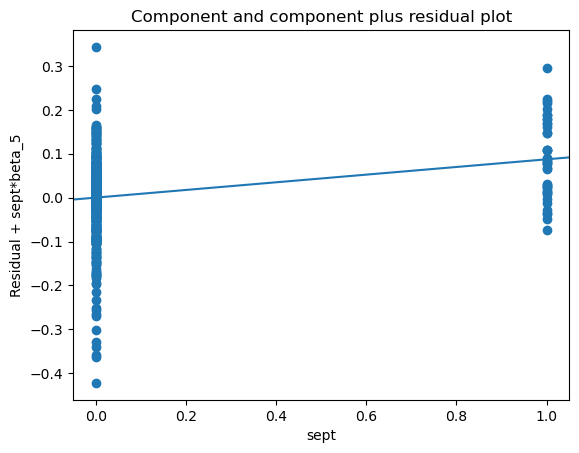

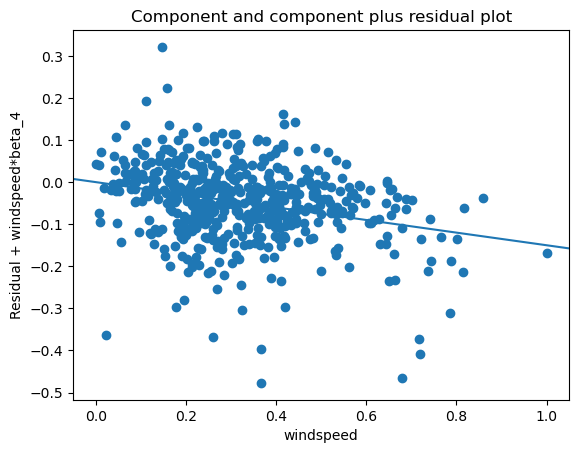

In [88]:
# Linear relationship validation using CCPR

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sept')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

In [89]:
# making pridiction using 5th final model
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thus,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
y_test = df_test.pop('cnt')
X_test = df_test

In [93]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [94]:
y_pred = lr_5.predict(X_test_lm_5)

In [95]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8063

# evaluating the model 

Text(0, 0.5, 'y_pred')

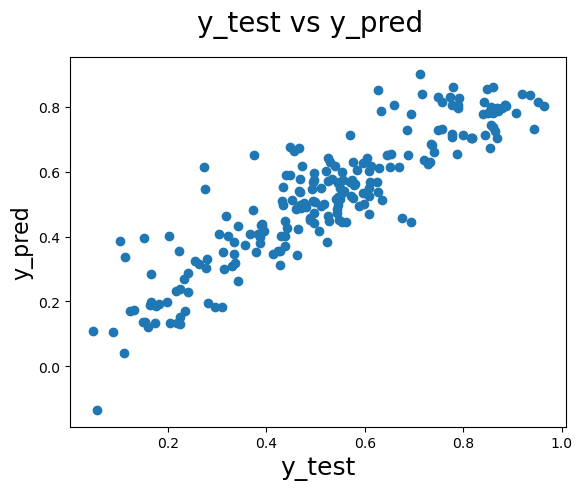

In [96]:
# Plotting y_test and y_pred to check the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [97]:
round(lr_5.params,4)

const             0.1406
year              0.2344
workingday        0.0555
temp              0.4796
windspeed        -0.1500
sept              0.0873
sun               0.0667
Light_snowrain   -0.2893
Misty            -0.0804
spring           -0.0554
summer            0.0626
winter            0.0958
dtype: float64

In [98]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


# Hence the adjusted r2 value is 0.7961

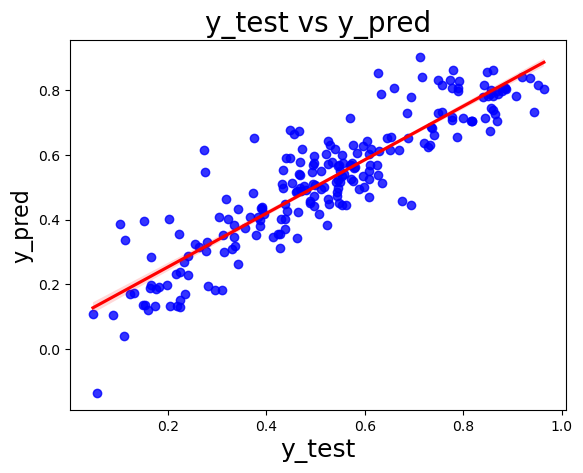

In [99]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()